## <font color="#f39c12"> Analisando alunos da teceira série do ensino médio </font>

### Essa análise foi conduzida com a finalidade de determinar como os alunos da terceira série do ensino médio se saíram durante a primeira etapa do ano de 2023. Os dados são reais e por isso foram anonimizados.

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score

In [95]:
terceiros = pd.read_excel("/Users/vitoriawillanidealmeida/Desktop/Chromos/Students_Score.xlsx")
terceiros

,ID,ARTE,FILOSOFIA,FÍSICA,ESPANHOL,INGLÊS,PORTUGUÊS,LITERATURA,REDAÇÃO,QUÍMICA,SOCIOLOGIA,MATEMÁTICA,BIOLOGIA,GEOGRAFIA,HISTÓRIA
0,Student_1,30,24,25,26,--,26,20,27,25,26,24,25,25,25
1,Student_2,28,23,27,--,28,23,22,24,26,23,22,24,27,26
2,Student_3,26,19,27,--,30,24,22,18,21,29,27,25,25,25
3,Student_4,22,23,22,--,28,25,22,26,27,24,22,23,25,23
4,Student_5,22,19,27,--,30,20,22,27,26,21,23,23,25,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,Student_83,20,18,15,--,22,17,15,19,13,20,15,14,16,15
83,Student_84,18,23,16,--,24,16,17,20,9,17,11,15,15,18
84,Student_85,18,18,16,--,22,20,15,17,13,17,16,15,16,15
85,Student_86,16,15,15,20,--,14,16,15,14,17,12,13,15,13


In [96]:
terceiros.columns

Index(['ID', 'ARTE', 'FILOSOFIA', 'FÍSICA', 'ESPANHOL', 'INGLÊS', 'PORTUGUÊS',
       'LITERATURA', 'REDAÇÃO', 'QUÍMICA', 'SOCIOLOGIA', 'MATEMÁTICA',
       'BIOLOGIA', 'GEOGRAFIA', 'HISTÓRIA'],
      dtype='object')

### A média das notas foi calculada e adicionada a uma nova coluna chamada MÉDIA. Um leitor atentendo irá notar que durante o cálculo da média o denominador foi fixado em 13, embora sejam 14 disciplinas. Isso ocorre pois um aluno faz INGLÊS ou ESPANHOL, mas nunca os dois. Portanto embora sejam 14 colunas cada aluno só possui 13 disciplinas cursadas.

In [97]:
def calcular_media(row):
    valores_numericos = row[pd.to_numeric(row, errors='coerce').notna()]
    return valores_numericos.sum() / 13

In [98]:
terceiros['MÉDIA'] = terceiros.apply(calcular_media, axis=1).round(2)

In [99]:
terceiros

,ID,ARTE,FILOSOFIA,FÍSICA,ESPANHOL,INGLÊS,PORTUGUÊS,LITERATURA,REDAÇÃO,QUÍMICA,SOCIOLOGIA,MATEMÁTICA,BIOLOGIA,GEOGRAFIA,HISTÓRIA,MÉDIA
0,Student_1,30,24,25,26,--,26,20,27,25,26,24,25,25,25,25.23
1,Student_2,28,23,27,--,28,23,22,24,26,23,22,24,27,26,24.85
2,Student_3,26,19,27,--,30,24,22,18,21,29,27,25,25,25,24.46
3,Student_4,22,23,22,--,28,25,22,26,27,24,22,23,25,23,24.00
4,Student_5,22,19,27,--,30,20,22,27,26,21,23,23,25,22,23.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,Student_83,20,18,15,--,22,17,15,19,13,20,15,14,16,15,16.85
83,Student_84,18,23,16,--,24,16,17,20,9,17,11,15,15,18,16.85
84,Student_85,18,18,16,--,22,20,15,17,13,17,16,15,16,15,16.77
85,Student_86,16,15,15,20,--,14,16,15,14,17,12,13,15,13,15.00


In [100]:
terceiros = terceiros.sort_values(by='MÉDIA', ascending=False).reset_index(drop=True)

In [101]:
terceiros

,ID,ARTE,FILOSOFIA,FÍSICA,ESPANHOL,INGLÊS,PORTUGUÊS,LITERATURA,REDAÇÃO,QUÍMICA,SOCIOLOGIA,MATEMÁTICA,BIOLOGIA,GEOGRAFIA,HISTÓRIA,MÉDIA
0,Student_44,30,23,25,--,30,21,23,25,21,29,25,23,27,27,25.31
1,Student_43,30,28,24,--,26,22,24,27,23,27,21,23,25,29,25.31
2,Student_1,30,24,25,26,--,26,20,27,25,26,24,25,25,25,25.23
3,Student_45,28,29,24,26,--,23,25,26,26,26,20,24,23,27,25.15
4,Student_2,28,23,27,--,28,23,22,24,26,23,22,24,27,26,24.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,Student_40,16,14,15,--,20,16,17,19,10,19,14,13,17,17,15.92
83,Student_86,16,15,15,20,--,14,16,15,14,17,12,13,15,13,15.00
84,Student_41,18,15,15,--,18,14,15,16,12,21,11,15,10,12,14.77
85,Student_42,18,14,9,--,16,16,17,18,11,16,10,7,11,13,13.54


### Uma coluna RANKING foi criada ordenando os alunos segundo seus médias gerais

In [102]:
terceiros["RANKING"] = terceiros.index +1
terceiros.head(87)

,ID,ARTE,FILOSOFIA,FÍSICA,ESPANHOL,INGLÊS,PORTUGUÊS,LITERATURA,REDAÇÃO,QUÍMICA,SOCIOLOGIA,MATEMÁTICA,BIOLOGIA,GEOGRAFIA,HISTÓRIA,MÉDIA,RANKING
0,Student_44,30,23,25,--,30,21,23,25,21,29,25,23,27,27,25.31,1
1,Student_43,30,28,24,--,26,22,24,27,23,27,21,23,25,29,25.31,2
2,Student_1,30,24,25,26,--,26,20,27,25,26,24,25,25,25,25.23,3
3,Student_45,28,29,24,26,--,23,25,26,26,26,20,24,23,27,25.15,4
4,Student_2,28,23,27,--,28,23,22,24,26,23,22,24,27,26,24.85,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,Student_40,16,14,15,--,20,16,17,19,10,19,14,13,17,17,15.92,83
83,Student_86,16,15,15,20,--,14,16,15,14,17,12,13,15,13,15.00,84
84,Student_41,18,15,15,--,18,14,15,16,12,21,11,15,10,12,14.77,85
85,Student_42,18,14,9,--,16,16,17,18,11,16,10,7,11,13,13.54,86


In [103]:
# média da sala está em 20.04 pontos
terceiros["MÉDIA"].mean()

20.068275862068965

In [104]:
# a média dos 5 melhor alunos e dos 5 piores alunos da turma

media_melhores = terceiros["MÉDIA"].head(5).mean()
media_melhores

25.169999999999998

In [105]:
media_piores= terceiros["MÉDIA"].tail(5).mean()
media_piores

14.416

In [106]:
Medias_perdidas = pd.DataFrame({"NENHUMA MÉDIA PERDIDA": [23], "UMA MÉDIA PERDIDA": [16], "DUAS MÉDIAS PERDIDAS": [10], "TRÊS MÉDIAS PERDIDAS": [10],"QUATRO MÉDIAS PERDIDAS": [4],
                                "CINCO MÉDIAS PERDIDAS": [3], "SEIS MÉDIAS PERDIDAS": [5], "SETE MÉDIAS PERDIDAS": [5],"OITO MÉDIAS PERDIDAS": [5],
                                "NOVE MÉDIAS PERDIDAS": [1], "DEZ OU MAIS MÉDIAS PERDIDAS": [5]})

In [107]:
Medias_perdidas = Medias_perdidas.transpose().rename(columns={0: "NÚMERO DE ALUNOS"})

print(Medias_perdidas)

                             NÚMERO DE ALUNOS
NENHUMA MÉDIA PERDIDA                      23
UMA MÉDIA PERDIDA                          16
DUAS MÉDIAS PERDIDAS                       10
TRÊS MÉDIAS PERDIDAS                       10
QUATRO MÉDIAS PERDIDAS                      4
CINCO MÉDIAS PERDIDAS                       3
SEIS MÉDIAS PERDIDAS                        5
SETE MÉDIAS PERDIDAS                        5
OITO MÉDIAS PERDIDAS                        5
NOVE MÉDIAS PERDIDAS                        1
DEZ OU MAIS MÉDIAS PERDIDAS                 5


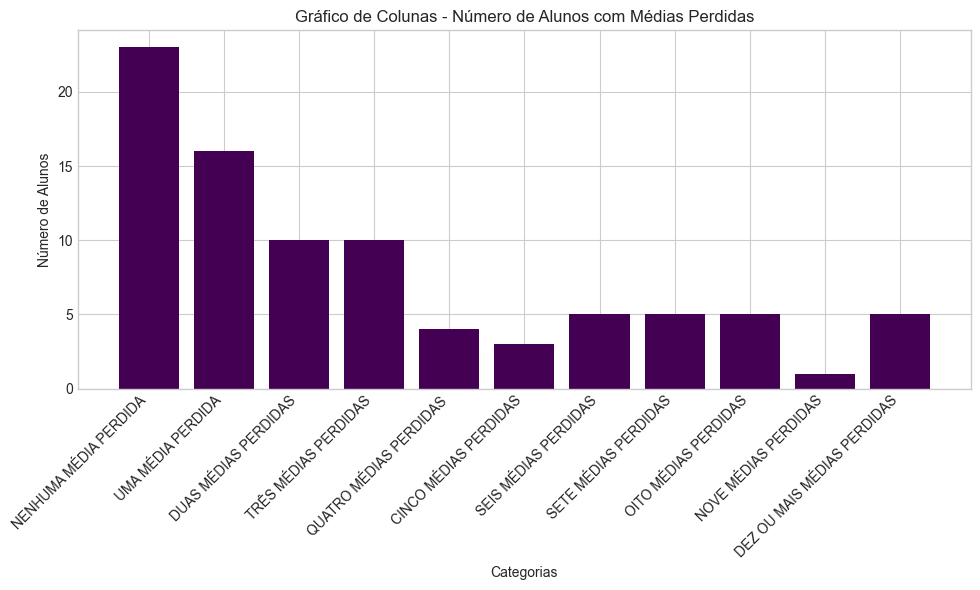

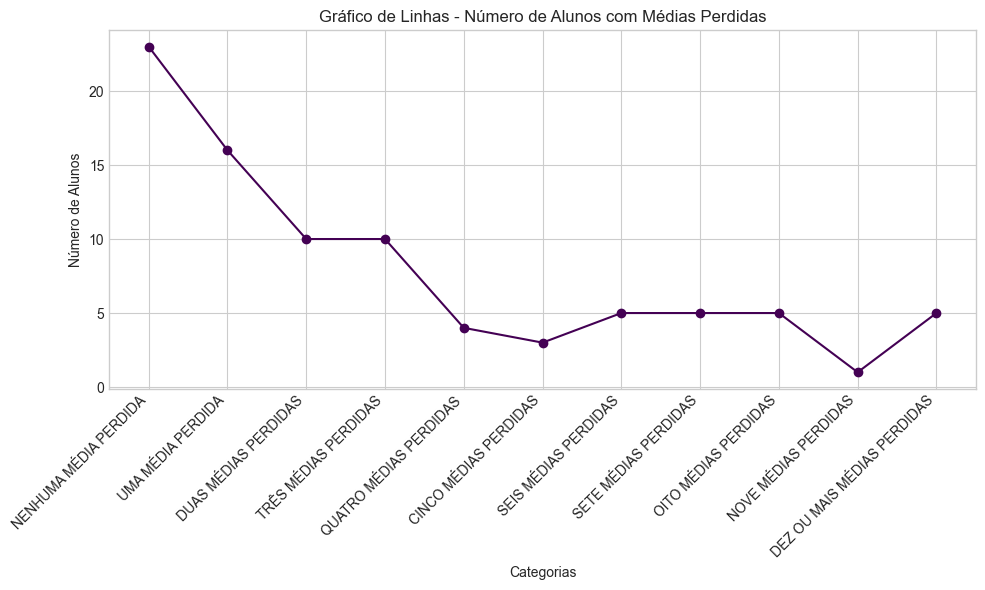

In [108]:

n = len(Medias_perdidas.columns)
colors = plt.cm.viridis(np.linspace(0, 1, n))

# Gráfico de colunas (bar chart)
plt.figure(figsize=(10, 6))
plt.bar(Medias_perdidas.index, Medias_perdidas["NÚMERO DE ALUNOS"], color=colors)
plt.xlabel("Categorias")
plt.ylabel("Número de Alunos")
plt.title("Gráfico de Colunas - Número de Alunos com Médias Perdidas")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Gráfico de linhas (line chart)
plt.figure(figsize=(10, 6))
plt.plot(Medias_perdidas.index, Medias_perdidas["NÚMERO DE ALUNOS"], marker="o", linestyle="-", color=colors)
plt.xlabel("Categorias")
plt.ylabel("Número de Alunos")
plt.title("Gráfico de Linhas - Número de Alunos com Médias Perdidas")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(True)
plt.show()

In [109]:
terceiros.tail(25)

,ID,ARTE,FILOSOFIA,FÍSICA,ESPANHOL,INGLÊS,PORTUGUÊS,LITERATURA,REDAÇÃO,QUÍMICA,SOCIOLOGIA,MATEMÁTICA,BIOLOGIA,GEOGRAFIA,HISTÓRIA,MÉDIA,RANKING
62,Student_31,24,21,17,--,22,20,22,21,12,20,19,13,17,17,18.85,63
63,Student_32,26,19,14,--,30,15,18,21,14,20,15,16,19,16,18.69,64
64,Student_73,22,18,18,--,20,18,17,22,16,20,18,16,18,19,18.62,65
65,Student_33,20,19,17,--,22,21,19,20,13,19,16,17,21,17,18.54,66
66,Student_75,18,20,19,28,--,21,17,19,14,20,14,15,17,17,18.38,67
67,Student_34,18,18,18,--,18,18,18,18,18,18,18,18,18,18,18.00,68
68,Student_76,20,16,14,26,--,15,15,23,17,19,14,17,19,16,17.77,69
69,Student_35,18,20,18,--,20,19,19,25,11,16,18,16,17,14,17.77,70
70,Student_77,22,19,18,--,24,17,19,20,16,19,16,11,16,13,17.69,71
71,Student_37,18,14,16,--,24,21,21,21,12,21,14,14,15,16,17.46,72


/var/folders/9b/rfg_xbf96s38bj0ys8cf0k7w0000gn/T/ipykernel_11976/3079197967.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


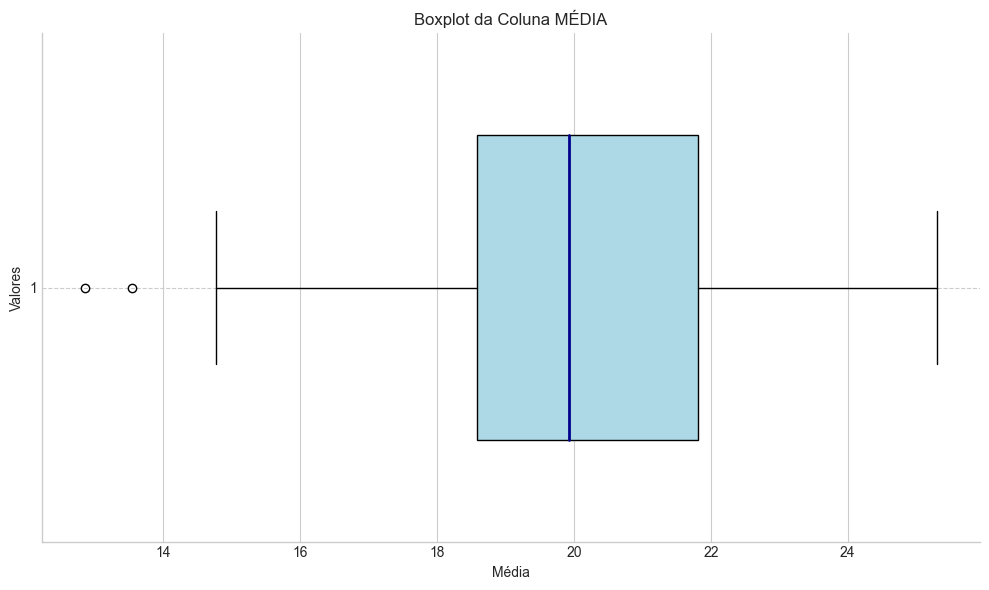

In [110]:

# Definir estilo do gráfico
plt.style.use("seaborn-whitegrid")

# Gerar o boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(terceiros["MÉDIA"], vert=False, widths=0.6, patch_artist=True, boxprops=dict(facecolor="lightblue", color="black"),
            medianprops=dict(color="darkblue", linewidth=2), whiskerprops=dict(color="black"), capprops=dict(color="black"))
plt.xlabel("Média")
plt.ylabel("Valores")
plt.title("Boxplot da Coluna MÉDIA")

# Remover os eixos da parte de cima e direita do gráfico
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)

# Adicionar uma grade de fundo
plt.grid(axis="y", linestyle="--")

plt.tight_layout()
plt.show()


In [111]:
mediana_das_médias = terceiros["MÉDIA"].median()
mediana_das_médias

19.92

### Clusterizamos os alunos em 4 diferentes grupos, assim a coordenação poderá tomar medidas específicas para cada grupo de alunos segundo as suas características

In [112]:

# Selecionando as colunas relevantes para a clusterização (por exemplo, notas, frequência, etc.)
colunas_selecionadas = ['ARTE', 'FILOSOFIA', 'FÍSICA','PORTUGUÊS',
       'LITERATURA', 'REDAÇÃO', 'QUÍMICA', 'SOCIOLOGIA', 'MATEMÁTICA',
       'BIOLOGIA', 'GEOGRAFIA', 'HISTÓRIA','MÉDIA']
dados_clusterizacao = terceiros[colunas_selecionadas]

# Substituindo os valores não numéricos por 0
terceiros[colunas_selecionadas] = terceiros[colunas_selecionadas].replace('--', 0) 

# Padronizando os dados (opcional, mas geralmente ajuda na clusterização)
scaler = StandardScaler()
dados_clusterizacao_padronizados = scaler.fit_transform(terceiros[colunas_selecionadas])

# Definindo o número de clusters que você deseja criar
numero_clusters = 4

# Criando o modelo K-Means
kmeans = KMeans(n_clusters=numero_clusters, random_state=314)

# Realizando a clusterização
terceiros['cluster'] = kmeans.fit_predict(dados_clusterizacao_padronizados)



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### Observando como as clusters estão distribuídos segundos as disciplinas de matemática e física:

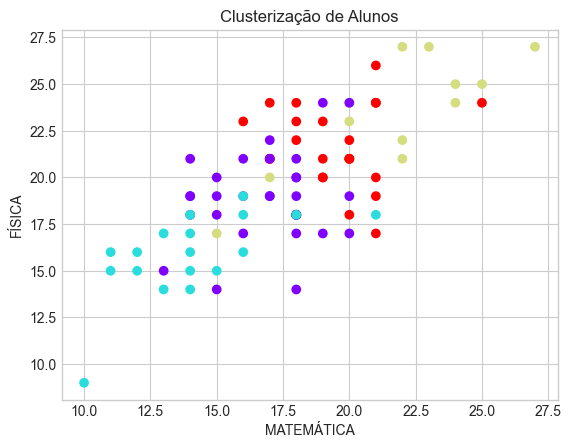

In [113]:

plt.scatter(terceiros['MATEMÁTICA'], terceiros['FÍSICA'], c=terceiros['cluster'], cmap='rainbow')
plt.xlabel('MATEMÁTICA')
plt.ylabel('FÍSICA')
plt.title('Clusterização de Alunos')
plt.show()

/var/folders/9b/rfg_xbf96s38bj0ys8cf0k7w0000gn/T/ipykernel_11976/2990097291.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color = plt.cm.get_cmap('Spectral')(float(i) / numero_clusters)


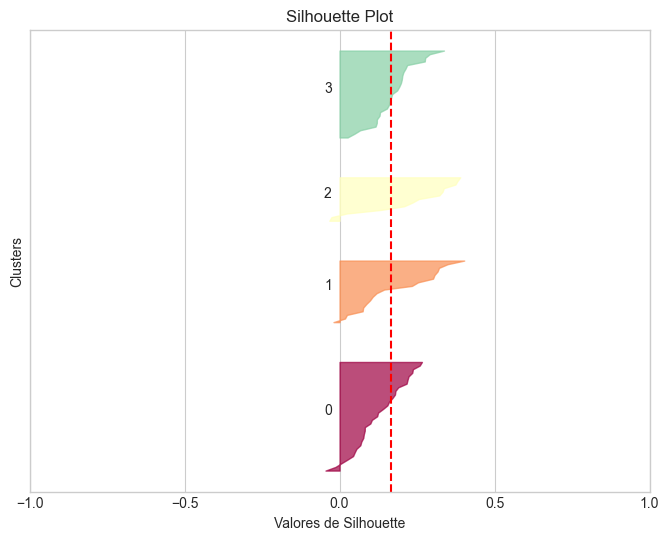

In [114]:

silhouette_avg = silhouette_score(dados_clusterizacao_padronizados, terceiros['cluster'])
sample_silhouette_values = silhouette_samples(dados_clusterizacao_padronizados, terceiros['cluster'])

plt.figure(figsize=(8, 6))
y_lower = 10
for i in range(numero_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[terceiros['cluster'] == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = plt.cm.get_cmap('Spectral')(float(i) / numero_clusters)
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

plt.axvline(x=silhouette_avg, color="red", linestyle="--")
plt.yticks([])
plt.xticks([-1, -0.5, 0, 0.5, 1])
plt.xlabel("Valores de Silhouette")
plt.ylabel("Clusters")
plt.title("Silhouette Plot")
plt.show()

Text(0.5, 1.01, 'Alunos')

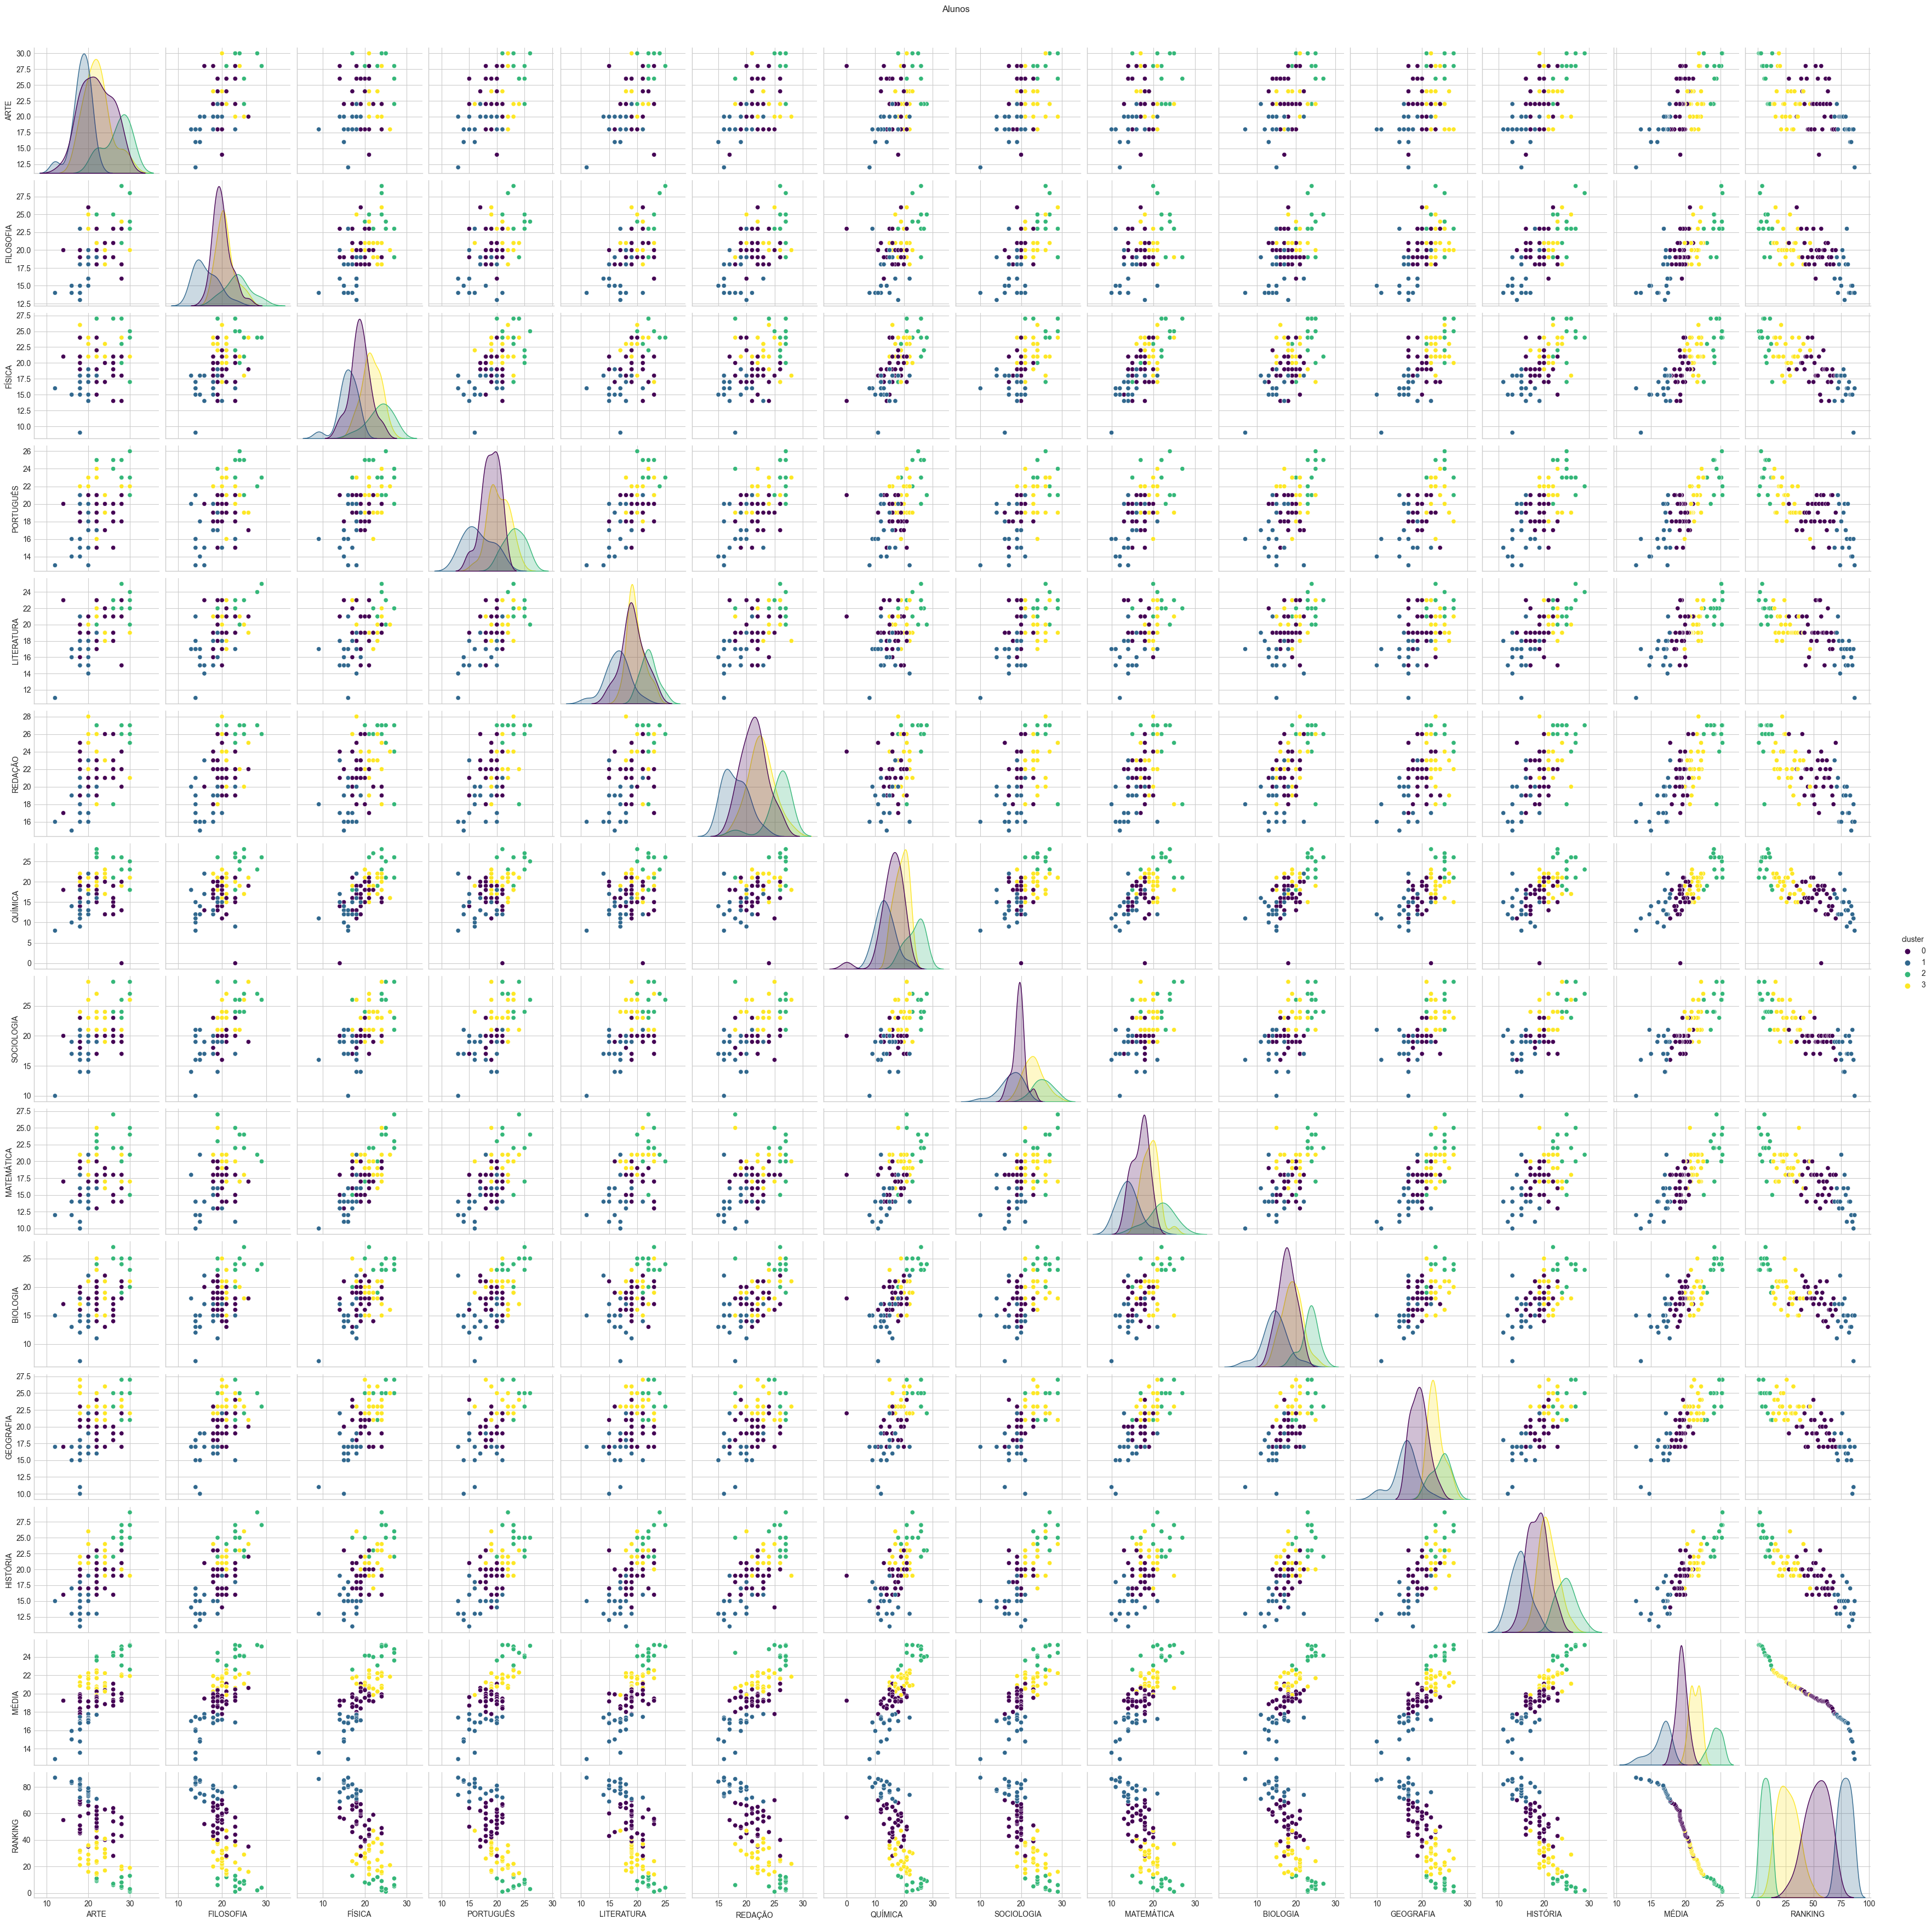

In [115]:
g = sns.pairplot(terceiros, hue="cluster", palette='viridis')
g.fig.suptitle("Alunos", y=1.01)

In [116]:
terceiros

,ID,ARTE,FILOSOFIA,FÍSICA,ESPANHOL,INGLÊS,PORTUGUÊS,LITERATURA,REDAÇÃO,QUÍMICA,SOCIOLOGIA,MATEMÁTICA,BIOLOGIA,GEOGRAFIA,HISTÓRIA,MÉDIA,RANKING,cluster
0,Student_44,30,23,25,--,30,21,23,25,21,29,25,23,27,27,25.31,1,2
1,Student_43,30,28,24,--,26,22,24,27,23,27,21,23,25,29,25.31,2,2
2,Student_1,30,24,25,26,--,26,20,27,25,26,24,25,25,25,25.23,3,2
3,Student_45,28,29,24,26,--,23,25,26,26,26,20,24,23,27,25.15,4,2
4,Student_2,28,23,27,--,28,23,22,24,26,23,22,24,27,26,24.85,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,Student_40,16,14,15,--,20,16,17,19,10,19,14,13,17,17,15.92,83,1
83,Student_86,16,15,15,20,--,14,16,15,14,17,12,13,15,13,15.00,84,1
84,Student_41,18,15,15,--,18,14,15,16,12,21,11,15,10,12,14.77,85,1
85,Student_42,18,14,9,--,16,16,17,18,11,16,10,7,11,13,13.54,86,1
